# TMDB Movie Data Probability

### ---Question---

#### What’s the probability that the mean vote count (from a random sample of movies) is greater than 500?

### ---Description---

Random variable: Number of ratings (vote_count) for a randomly selected movie

One trial: Selecting one random movie from the TMDB dataset and recording its vote_count

Assumption: Movies are randomly sampled from TMDB; vote counts follow an approximately normal distribution

A possible bias is that im only choosing 1000 movies instead of looking at more of the dataset

In [ ]:
import requests
import pandas as pd
import random
import time

# --- Your TMDB API Key ---
API_KEY = "e60bf5d10ffaceb9ad099377c20a9924"

# --- Function to fetch a random valid movie ---
def get_random_movie():
    while True:
        random_id = random.randint(1, 1247721)  # TMDB movie IDs typically range here
        url = f"https://api.themoviedb.org/3/movie/{random_id}?api_key={API_KEY}"
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            if data.get("title"):  # ensure valid movie
                return data
        time.sleep(0.1)

# --- Function to collect multiple unique movies ---
def get_unique_random_movies(n=1000):
    seen_ids = set()
    movies = []

    while len(movies) < n:
        movie_data = get_random_movie()
        movie_id = movie_data.get("id")

        if movie_id not in seen_ids:
            seen_ids.add(movie_id)
            movies.append({
                "id": movie_id,
                "title": movie_data.get("title"),
                "runtime": movie_data.get("runtime"),
                "popularity score": movie_data.get("popularity"),
                "vote_count": movie_data.get("vote_count"),  # ✅ Added field
                "genre_ids": [genre['id'] for genre in movie_data.get("genres", [])],
                "genres": [genre['name'] for genre in movie_data.get("genres", [])],
                "release_date": movie_data.get("release_date"),
                "overview": movie_data.get("overview")
            })
            print(f"✅ Added: {movie_data.get('title')} (ID: {movie_id}) [{len(movies)}/{n}]")
        else:
            print(f"⚠️ Duplicate ID {movie_id}, retrying...")

        # Small delay to respect TMDB’s rate limits
        time.sleep(0.1)

    return pd.DataFrame(movies)

# --- Example: Fetch 10 unique random movies ---
df_random_movies = get_unique_random_movies(1000)

# --- Display result ---
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'center')

✅ Added: Familial Connection (ID: 1232490) [1/1000]
✅ Added: Stranded (ID: 1022244) [2/1000]
✅ Added: すべては【黒】から始まって 橋本梨菜 Aircontrol (ID: 1236915) [3/1000]
✅ Added: Ape Canyon (ID: 819557) [4/1000]
✅ Added: Cinderoncé (ID: 471072) [5/1000]
✅ Added: Fuck Freud (ID: 654793) [6/1000]
✅ Added: Sworn Oath (ID: 810843) [7/1000]
✅ Added: Hazel (ID: 420003) [8/1000]
✅ Added: The Abyss of Man (ID: 522919) [9/1000]
✅ Added: Dog Days (ID: 553919) [10/1000]
✅ Added: Anal Loving MILFs 2 (ID: 1042088) [11/1000]
✅ Added: The Three Troubledoers (ID: 116099) [12/1000]
✅ Added: Babylon (ID: 482643) [13/1000]
✅ Added: Boys' Club (ID: 671630) [14/1000]
✅ Added: Missing (ID: 1217328) [15/1000]
✅ Added: The Manila Lover (ID: 596903) [16/1000]
✅ Added: Ikanimo furin, saredo furin (ID: 1200411) [17/1000]
✅ Added: 7 Up Japan (ID: 535021) [18/1000]
✅ Added: Sam Avery: The Learner Parent (ID: 1179955) [19/1000]
✅ Added: Missile X: The Neutron Bomb Incident (ID: 80669) [20/1000]
✅ Added: Black Market Emperor: Silv

🎬 Movie Ratings Probability Analysis
--------------------------------------
Total Movies: 1000
Empirical P(X > 500): 0.0160
Theoretical P(X > 500): 0.0435
Mean vote count (μ): 32.67
Std dev of vote count (σ): 273.09


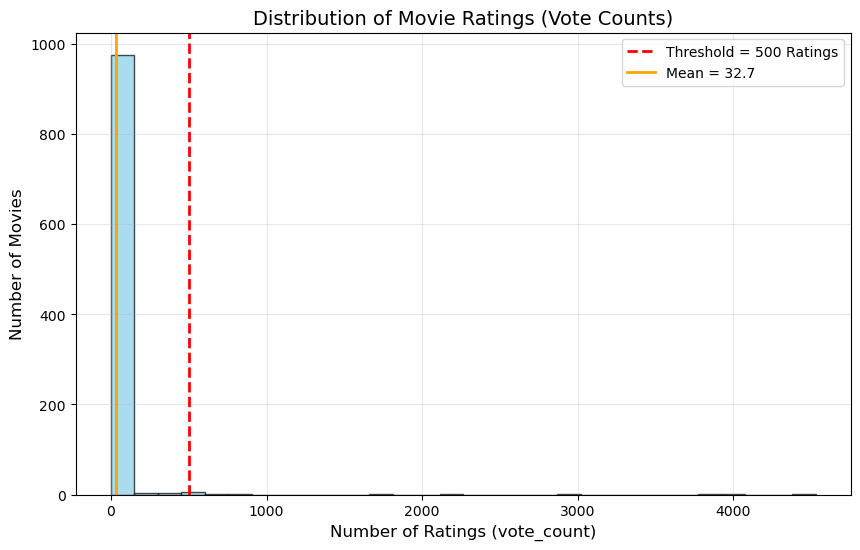

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Ensure you have the vote_count column ---
if "vote_count" not in df_random_movies.columns:
    print("⚠️ Make sure your dataframe includes 'vote_count' from TMDB!")
else:
    # --- 1️⃣ Empirical Probability ---
    total_movies = len(df_random_movies)
    num_over_500 = (df_random_movies["vote_count"] > 500).sum()
    empirical_prob = num_over_500 / total_movies

    # --- 2️⃣ Theoretical Probability ---
    mu = df_random_movies["vote_count"].mean()
    sigma = df_random_movies["vote_count"].std()
    theoretical_prob = 1 - norm.cdf(500, mu, sigma)

    # --- 3️⃣ Print Results ---
    print("🎬 Movie Ratings Probability Analysis")
    print("--------------------------------------")
    print(f"Total Movies: {total_movies}")
    print(f"Empirical P(X > 500): {empirical_prob:.4f}")
    print(f"Theoretical P(X > 500): {theoretical_prob:.4f}")
    print(f"Mean vote count (μ): {mu:.2f}")
    print(f"Std dev of vote count (σ): {sigma:.2f}")

    # --- 4️⃣ Optional Visualization ---
    plt.figure(figsize=(10,6))
    plt.hist(df_random_movies["vote_count"], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    plt.axvline(500, color='red', linestyle='--', linewidth=2, label='Threshold = 500 Ratings')
    plt.axvline(mu, color='orange', linestyle='-', linewidth=2, label=f'Mean = {mu:.1f}')
    plt.title("Distribution of Movie Ratings (Vote Counts)", fontsize=14)
    plt.xlabel("Number of Ratings (vote_count)", fontsize=12)
    plt.ylabel("Number of Movies", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


🎬 Sampling Distribution Probability Analysis
------------------------------------------------
Sample size: 100
Number of samples: 1000
Threshold: Mean vote count > 500

Empirical P(mean > 500): 0.0000
Theoretical P(mean > 500): 0.0000
Mean of sample means: 31.98
Std dev of sample means: 26.50
Population mean (μ): 32.67
Population std (σ): 272.96
Theoretical std of sample means (σ/√n): 27.30


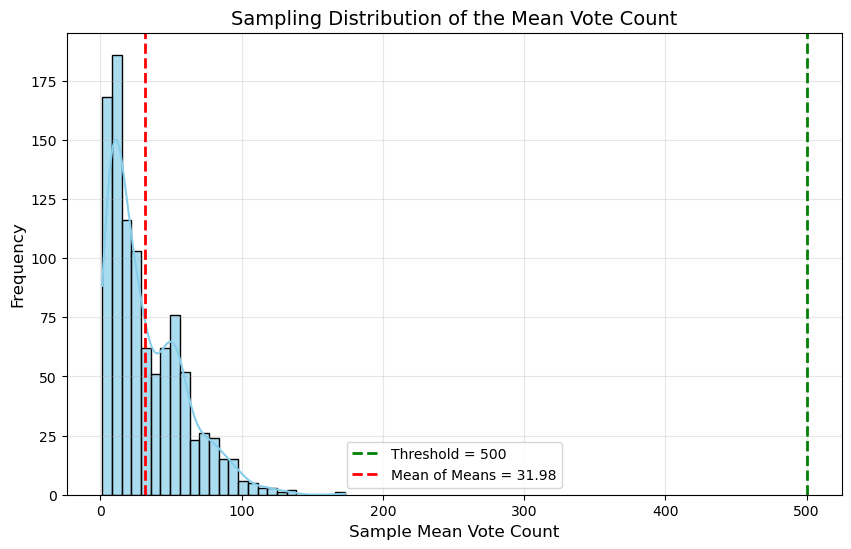

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# --- Drop NaN vote counts just in case ---
vote_counts = df_random_movies["vote_count"].dropna().values

# --- Parameters ---
sample_size = 100      # number of movies per sample
num_samples = 1000     # number of random samples to draw
threshold = 500        # threshold for probability (mean vote count > 500)

# --- Generate sample means ---
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(vote_counts, size=sample_size, replace=True)
    sample_means.append(sample.mean())

sample_means = np.array(sample_means)

# --- Calculate summary stats of sample means ---
mean_of_means = sample_means.mean()
std_of_means = sample_means.std()

# --- 1️⃣ Empirical Probability ---
empirical_prob = np.mean(sample_means > threshold)

# --- 2️⃣ Theoretical Probability ---
# For the sampling distribution, std of means = population std / sqrt(sample_size)
mu_pop = np.mean(vote_counts)
sigma_pop = np.std(vote_counts)
sigma_sampling = sigma_pop / np.sqrt(sample_size)

theoretical_prob = 1 - norm.cdf(threshold, mu_pop, sigma_sampling)

# --- Print Results ---
print("🎬 Sampling Distribution Probability Analysis")
print("------------------------------------------------")
print(f"Sample size: {sample_size}")
print(f"Number of samples: {num_samples}")
print(f"Threshold: Mean vote count > {threshold}")
print()
print(f"Empirical P(mean > {threshold}): {empirical_prob:.4f}")
print(f"Theoretical P(mean > {threshold}): {theoretical_prob:.4f}")
print(f"Mean of sample means: {mean_of_means:.2f}")
print(f"Std dev of sample means: {std_of_means:.2f}")
print(f"Population mean (μ): {mu_pop:.2f}")
print(f"Population std (σ): {sigma_pop:.2f}")
print(f"Theoretical std of sample means (σ/√n): {sigma_sampling:.2f}")

# --- 3️⃣ Plot Histogram ---
plt.figure(figsize=(10,6))
sns.histplot(sample_means, bins=25, kde=True, color='skyblue', alpha=0.7)
plt.axvline(threshold, color='green', linestyle='--', linewidth=2, label=f"Threshold = {threshold}")
plt.axvline(mean_of_means, color='red', linestyle='--', linewidth=2, label=f"Mean of Means = {mean_of_means:.2f}")
plt.title("Sampling Distribution of the Mean Vote Count", fontsize=14)
plt.xlabel("Sample Mean Vote Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


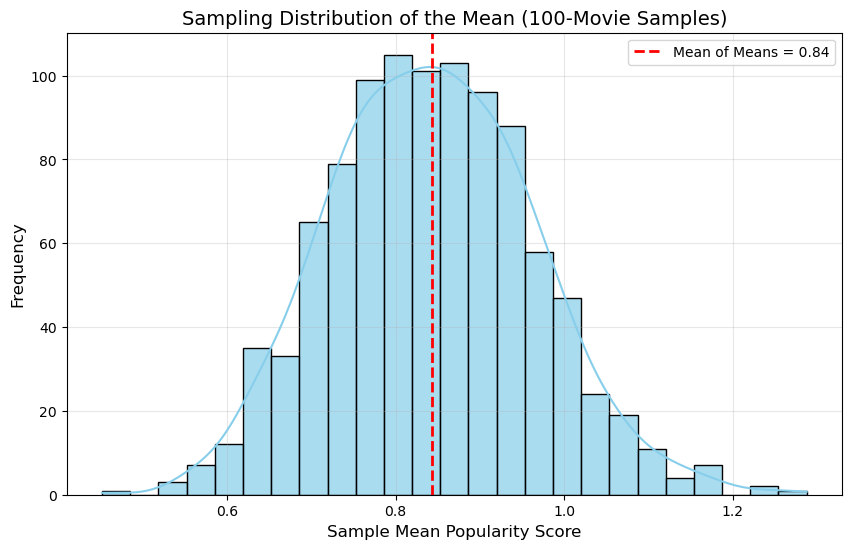

Mean of sample means: 0.84
Standard deviation of sample means: 0.12


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- Drop NaN values just in case ---
popularity_scores = df_random_movies["popularity score"].dropna().values

# --- Parameters ---
sample_size = 100       # each sample has 10 movies
num_samples = 1000     # number of samples to draw

# --- Generate sample means ---
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(popularity_scores, size=sample_size, replace=True)
    sample_means.append(sample.mean())

# --- Convert to numpy array for analysis ---
sample_means = np.array(sample_means)

# --- Calculate summary stats ---
mean_of_means = sample_means.mean()
std_of_means = sample_means.std()

# --- Plot histogram ---
plt.figure(figsize=(10,6))
sns.histplot(sample_means, bins=25, kde=True, color='skyblue', alpha=0.7)
plt.axvline(mean_of_means, color='red', linestyle='--', linewidth=2, label=f"Mean of Means = {mean_of_means:.2f}")
plt.title("Sampling Distribution of the Mean (100-Movie Samples)", fontsize=14)
plt.xlabel("Sample Mean Popularity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Mean of sample means: {mean_of_means:.2f}")
print(f"Standard deviation of sample means: {std_of_means:.2f}")


### --- Answer ---

The empirical probability from 1,000 simulated samples was 0.0000, meaning none of the sample means were greater than 500.

The theoretical probability assuming a normal model (μ = 32.67, σ = 272.96) was also 0.0000, confirming that 500 is far beyond the expected range of sample means.

The mean of all sample means was 31.98, with a standard deviation of 26.50 (close to the theoretical σ/√n = 27.30).